# Comparison between the types for the ages (after controlling for gender)

Questions

- What are the differences between the types for the ages?
- Do we observe the same changes as globally?

# Loads

## Libraries and functions

In [3]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [4]:
source("functions.R")

## Data

In [5]:
load("../results/dge/gene_length.RData")
load("../results/dge/filtered_metadata.RData")
load("../results/dge/dge.RData")
load("../results/dge/filtered_norm_counts.RData")
load("../results/dge/filtered_z_scores.RData")
load("../results/dge/dge_net_pal2.RData")
load("../results/dge/col_order.RData")
load("../results/dge/annot_col.RData")
load("../results/dge/genes_in_modules.RData")

In [6]:
dir_path = "type-effect/type_age/"

# Differentially expressed genes

Extract DEG between GF and SPF for the different ages
- Threshold for adjusted p-value: 0.05
- Threshold for adjusted significant fold change: 1.5

Table with the factors

Info | M vs F | GF vs SPF | Middle-aged vs Young | Old vs Young | M & Middle-aged | M & Old | M & GF | GF & Middle-aged | GF & Old
--- | --- | --- | --- | --- | --- | --- | --- | --- | ---
GF vs SPF (Young) | | 1 | | | | | 1/2 | |
GF vs SPF (Middle-aged) | | 1 | | | | | 1/2 | 1 |
GF vs SPF (Old) | | 1 | | | | | 1/2 | | 1

In [7]:
GF_SPF = list()
GF_SPF$'GF VS SPF (Young)' = get_results(dge, contrast=c(0,0,1,0,0,0,0,1/2,0,0))
GF_SPF$'GF VS SPF (Middle-aged)' = get_results(dge, contrast= c(0,0,1,0,0,0,0,1/2,1,0))
GF_SPF$'GF VS SPF (Old)' = get_results(dge, contrast= c(0,0,1,0,0,0,0,1/2,0,1))

Extract the log2FC of the DEG

In [8]:
type_age_deg = extract_DEG_log2FC(GF_SPF, dir_path)

# Stats

Using type as id variables


,GF VS SPF (Young),GF VS SPF (Middle-aged),GF VS SPF (Old)
All DEG (Wald padj < 0.05),185,809,3287
All over-expressed genes (Wald padj < 0.05 & FC > 0),121,337,1474
All under-expressed genes (Wald padj < 0.05 & FC < 0),64,472,1813
DEG (Wald padj < 0.05 & abs(FC) >= 1.5),108,322,1266
Over-expressed genes (Wald padj < 0.05 & FC >= 1.5),78,112,325
Under-expressed genes (Wald padj < 0.05 & FC <= -1.5),30,210,941


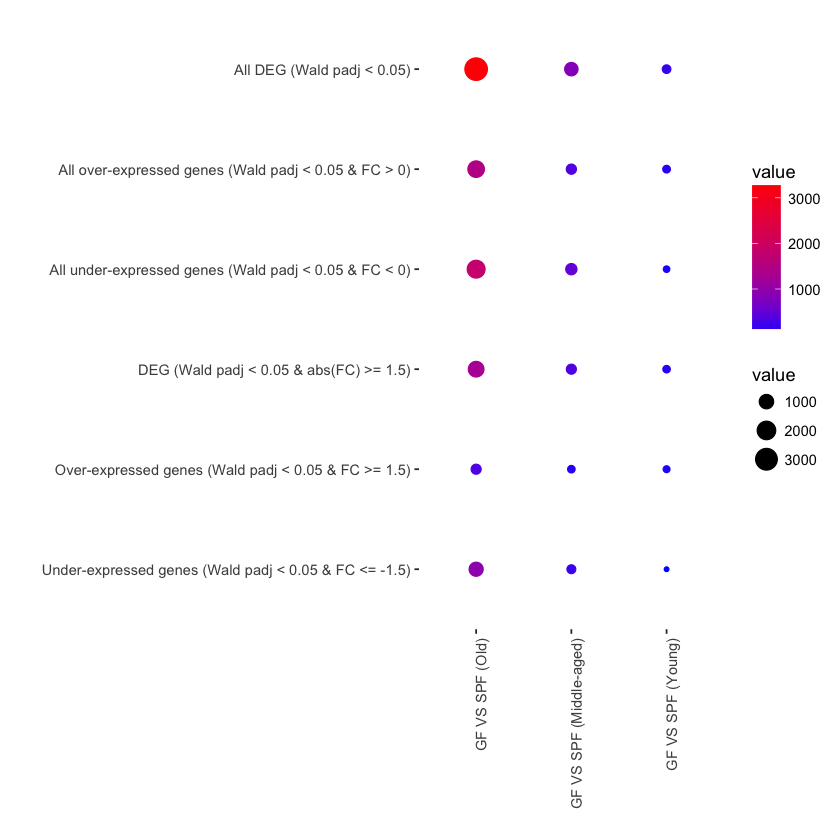

In [9]:
type_age_deg = extract_DEG_stats(type_age_deg)
type_age_deg$stat

All DEG (Wald padj < 0.05)

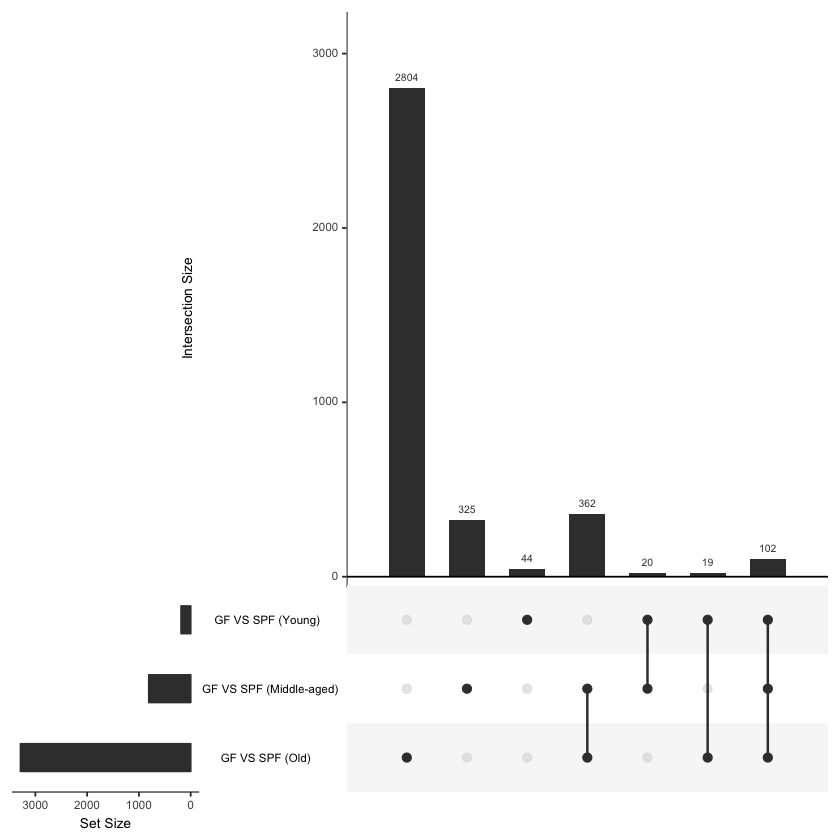

In [10]:
plot_sign_DEG_upset(type_age_deg)

DEG (Wald padj < 0.05 & abs(FC) > 1.5)

pdf 
  2

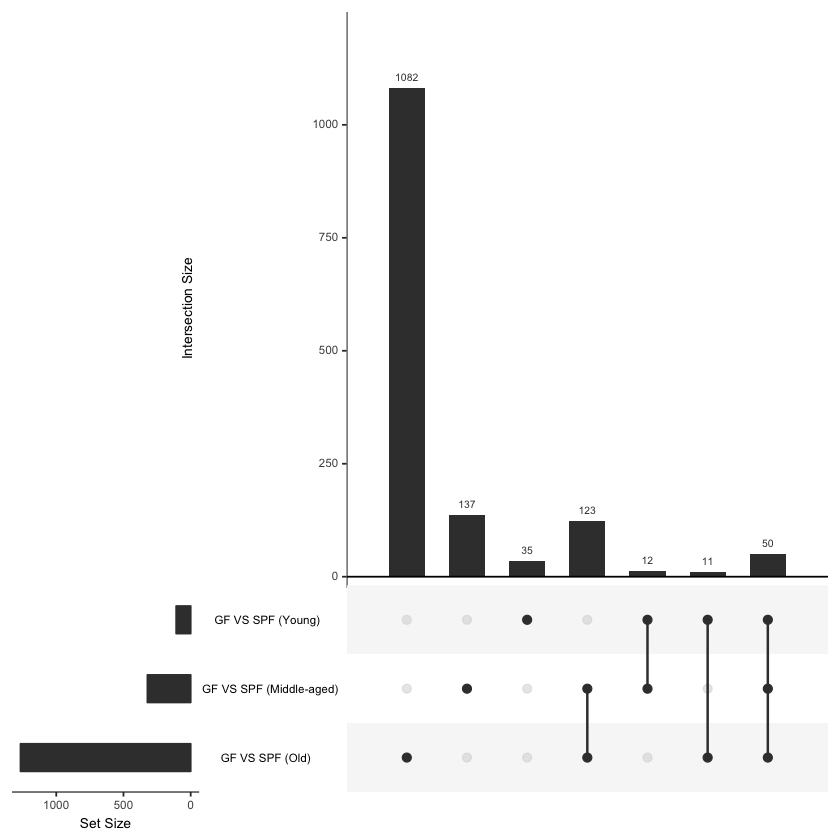

In [11]:
pdf(paste('../results/dge/', dir_path, '/sign_FC_DEG_upset.pdf', sep=''))
plot_sign_FC_DEG_upset(type_age_deg)
dev.off()
plot_sign_FC_DEG_upset(type_age_deg)

# DEG (Wald padj < 0.05 & abs(FC) > 1.5)

## Log2FC

,comp,age
GF VS SPF (Young),GF VS SPF,Young
GF VS SPF (Middle-aged),GF VS SPF,Middle-Aged
GF VS SPF (Old),GF VS SPF,Old


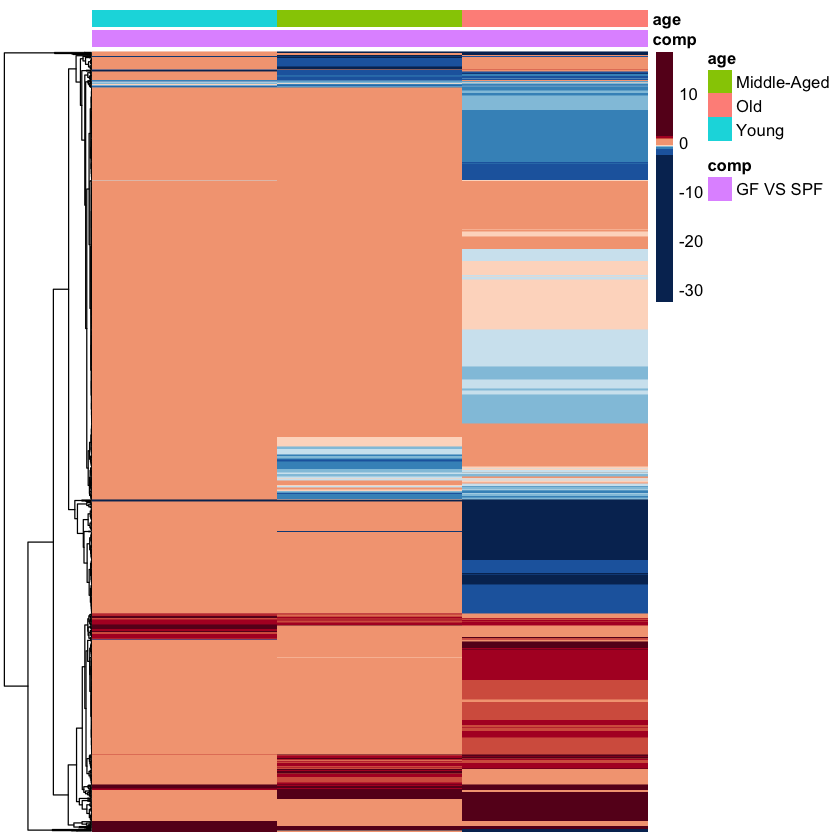

In [12]:
data = type_age_deg$sign_fc_deg %>% select(-genes)
fc_annot = data.frame(comp = rep("GF VS SPF",3),
                      age = c("Young", "Middle-Aged", "Old"),
                      row.names = colnames(data))
fc_annot
plot_fc_heatmap(data, fc_annot)

## Counts

GF != SPF for 8w with abs(FC) > 2

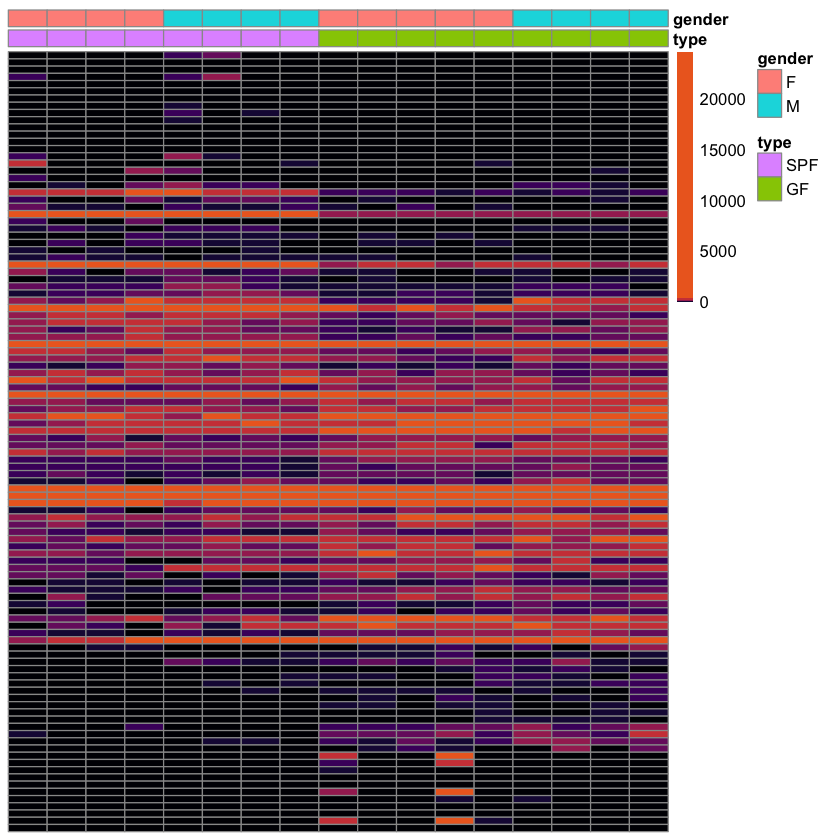

In [13]:
# GF != SPF for 8w with abs(FC) > 2
genes = names((sort(type_age_deg$fc_deg[which(abs(type_age_deg$fc_deg[,1])>1),1])))
plot_count_heatmap(genes,w8_samples, annot)

GF != SPF for 52w with abs(FC) > 2

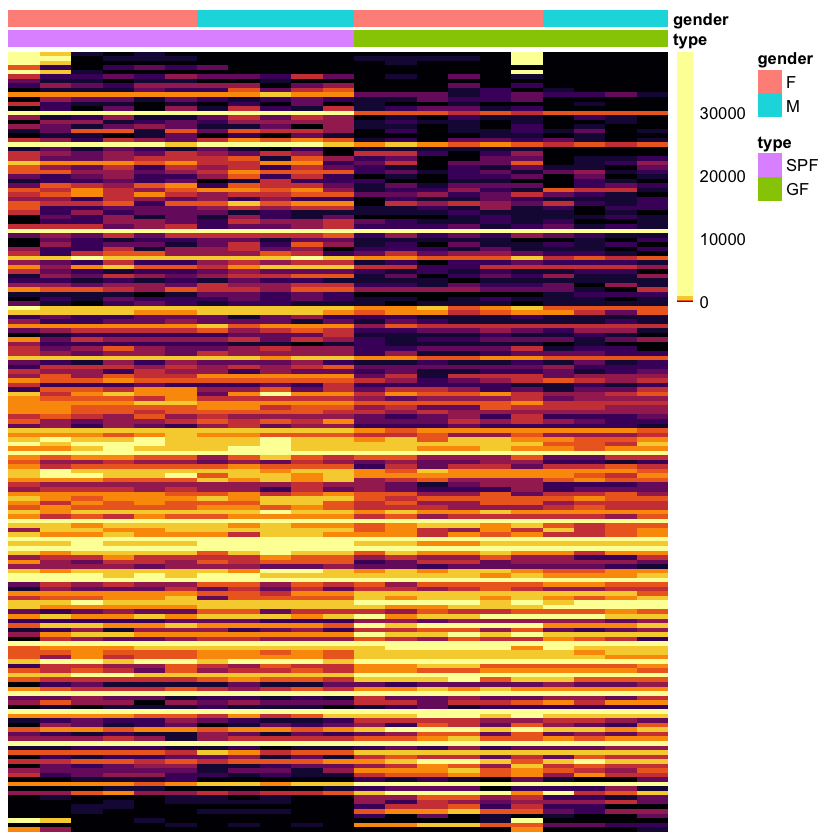

In [14]:
# GF != SPF for 52w with abs(FC) > 2
genes = names((sort(type_age_deg$fc_deg[which(abs(type_age_deg$fc_deg[,2])>1),2])))
plot_count_heatmap(genes,w52_samples, annot)

GF != SPF for 104w with abs(FC) > 2

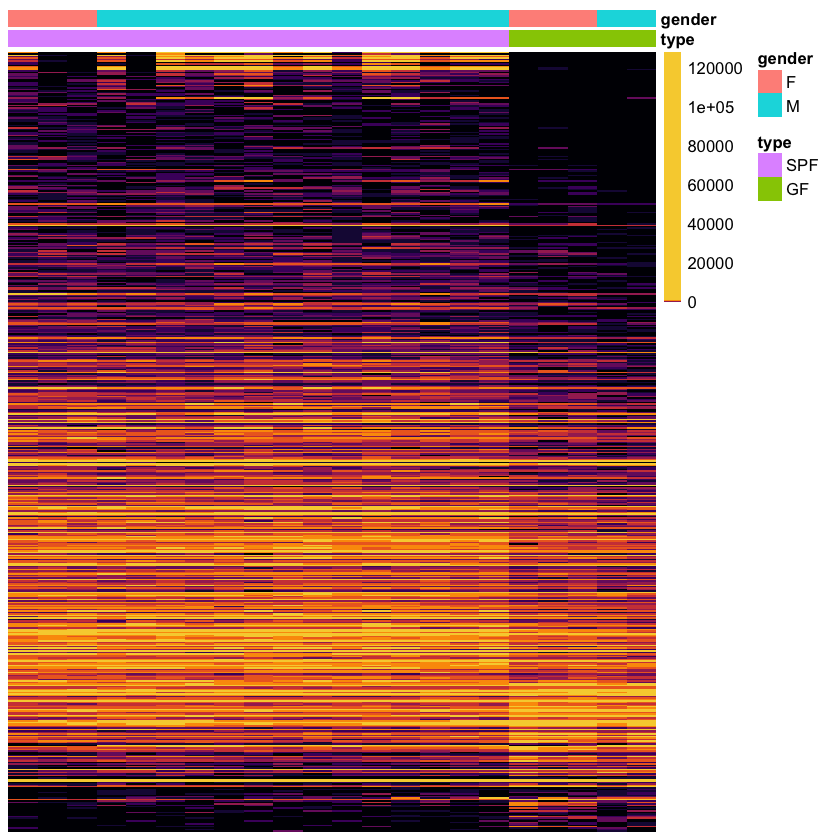

In [15]:
# GF != SPF for 104w with abs(FC) > 2
genes = names((sort(type_age_deg$fc_deg[which(abs(type_age_deg$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,w104_samples, annot)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

GF vs SPF: 8w, 52w, 104w


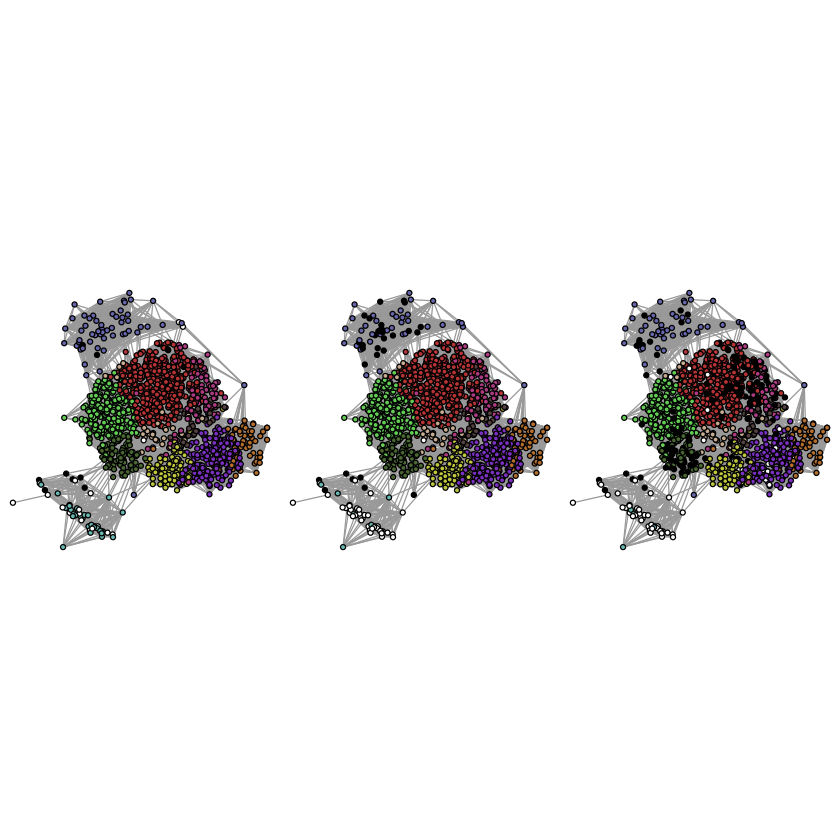

In [16]:
par(mfrow=c(1,3),mar=c(0,0,0,0))
col_GF_vs_SPF_8w = get_deg_colors(type_age_deg, to_comp[1], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_8w, pal2, layout, add_legend = FALSE)
col_GF_vs_SPF_52w = get_deg_colors(type_age_deg, to_comp[2], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_52w, pal2, layout, add_legend = FALSE)
col_GF_vs_SPF_104w = get_deg_colors(type_age_deg, to_comp[3], connected_gene_colors, module_nb)
plot_net_with_layout(net, col_GF_vs_SPF_104w, pal2, layout, add_legend = FALSE)

# GO analysis

In [17]:
full_go_desc = type_age_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = type_age_deg$GO_wall[[1]][,"category"]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


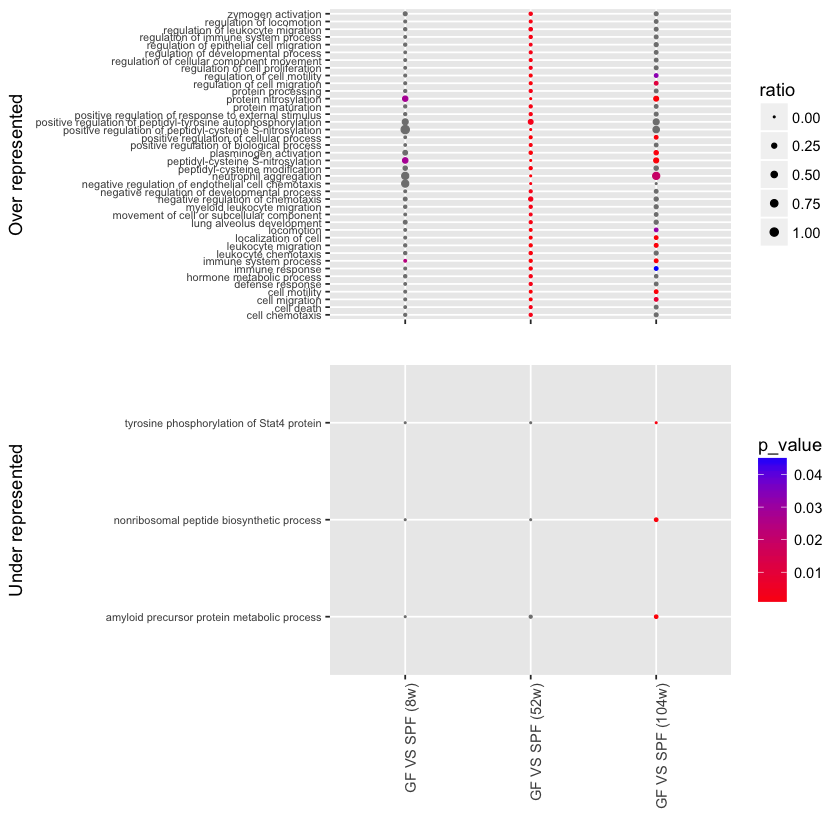

In [18]:
plot_top_go(type_age_deg,
            "BP",
            40)

Network based on description similarity

In [19]:
BP_network = create_GO_network(type_age_deg, "BP", BP_GO)

GF vs SPF: 8w, 52w, 104w

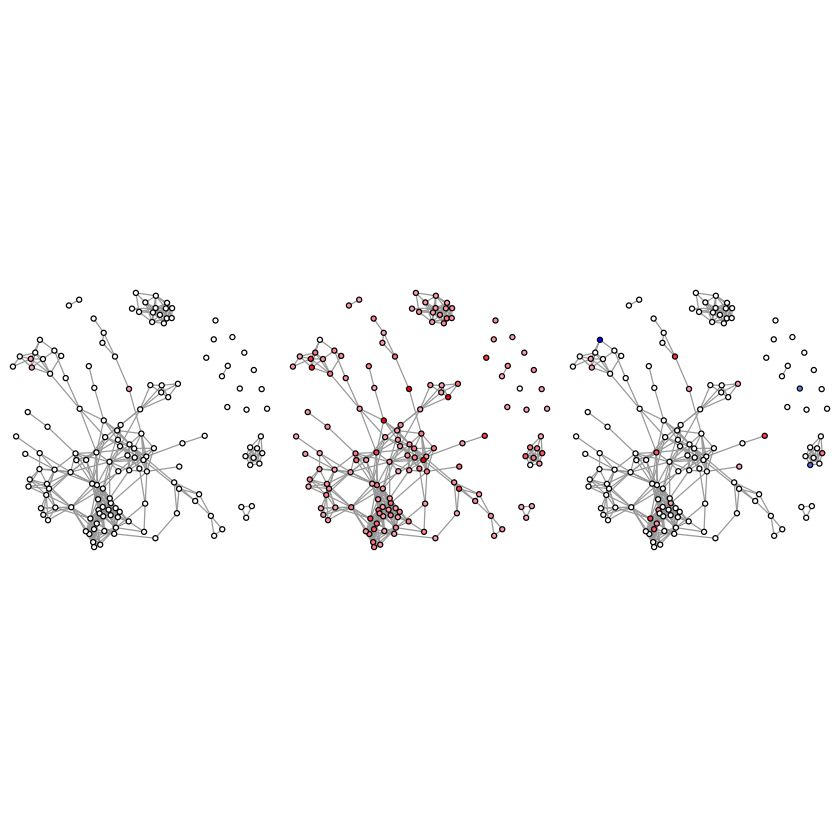

In [20]:
par(mfrow=c(1,3),mar=c(0,0,0,0))
plot_GO_networks(BP_network, to_comp[1], full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, to_comp[2], full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, to_comp[3], full_go_desc, plot_interactive = FALSE)

### GF VS SPF (8w)

In [21]:
col = get_GO_network_col(BP_network, "GF VS SPF (8w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_age/go/GF_VS_SPF_8w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_age/go/GF_VS_SPF_8w.png)

GO Tree at "../results/dge/type-effect/type_age/go/GF_VS_SPF_8w.png"

### GF VS SPF (52w)

In [22]:
col = get_GO_network_col(BP_network, "GF VS SPF (52w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_age/go/GF_VS_SPF_52w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_age/go/GF_VS_SPF_52w.png)

GO Tree at "../results/dge/type-effect/type_age/go/GF_VS_SPF_52w.png"

### GF VS SPF (104w)

In [23]:
col = get_GO_network_col(BP_network, "GF VS SPF (104w)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/type-effect/type_age/go/GF_VS_SPF_104w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/type-effect/type_age/go/GF_VS_SPF_104w.png)

GO Tree at "../results/dge/type-effect/type_age/go/GF_VS_SPF_104w.png"

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Using term, id as id variables


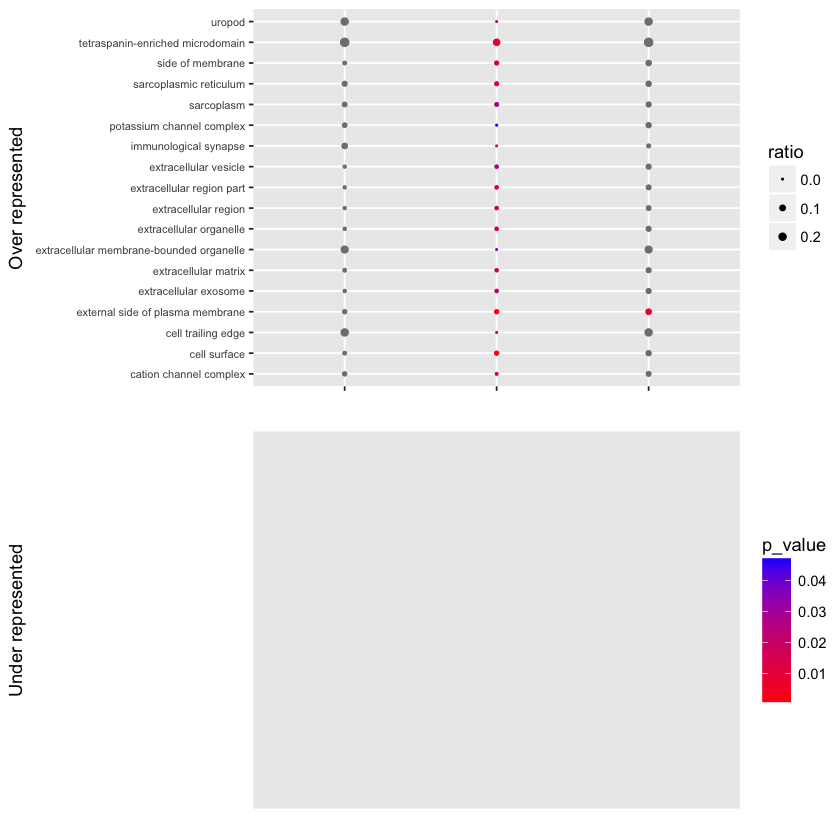

In [24]:
plot_top_go(type_age_deg,
            "CC",
            40)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


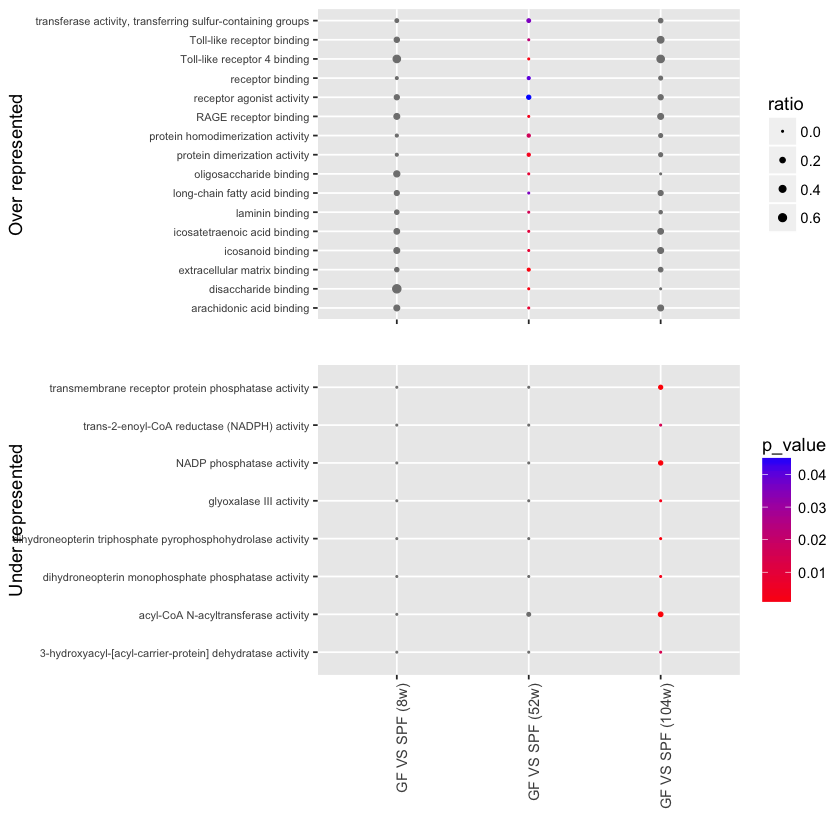

In [25]:
plot_top_go(type_age_deg,
            "MF",
            40)

# KEGG pathways

In [26]:
plot_kegg_pathways(type_age_deg$over_represented_KEGG[,"category"],
                   type_age_deg$fc_deg,
                   "../results/dge/type-effect/type_age/kegg/over_repr_kegg/")

ERROR: Error in `$<-.data.frame`(`*tmp*`, labels, value = c("", "", "", "", "", : replacement has 58 rows, data has 62


Pathway graphs available at ../results/dge/type-effect/type_age/over_repr_kegg/

In [ ]:
plot_kegg_pathways(type_age_deg$under_represented_KEGG[,"category"],
                   type_age_deg$fc_deg,
                   "../results/dge/type-effect/type_age/kegg/under_repr_kegg/")

Pathway graphs available at ../results/dge/type-effect/type_age/under_repr_kegg/